In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


### Import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## For statistical test
from scipy.stats import chisquare, chi2_contingency ## Stastical test
from scipy.stats import probplot
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


## machine learning libary
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_recall_fscore_support,roc_curve
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [3]:
data = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv')

In [4]:
data = data[data['Age'] > 3.0].reset_index()

### check the heasd of the dataset

In [5]:
data.head()

,index,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## chcecking the dataset information 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229259 entries, 0 to 229258
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 229259 non-null  int64  
 1   Diabetes_binary       229259 non-null  float64
 2   HighBP                229259 non-null  float64
 3   HighChol              229259 non-null  float64
 4   CholCheck             229259 non-null  float64
 5   BMI                   229259 non-null  float64
 6   Smoker                229259 non-null  float64
 7   Stroke                229259 non-null  float64
 8   HeartDiseaseorAttack  229259 non-null  float64
 9   PhysActivity          229259 non-null  float64
 10  Fruits                229259 non-null  float64
 11  Veggies               229259 non-null  float64
 12  HvyAlcoholConsump     229259 non-null  float64
 13  AnyHealthcare         229259 non-null  float64
 14  NoDocbcCost           229259 non-null  float64
 15  

In [7]:
### check for missing values
data.isnull().sum().any()

False

### Exploratory data analysis (descriptive analysis)

### Uni-variate analysis of the data

**Question 1**

Diabetes patient class

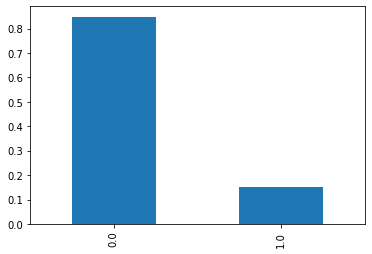

In [8]:
data['Diabetes_binary'].value_counts(normalize=True).plot(kind='bar');

**Observation**

we observe that less than 20% of the patient are with diabetes.

**Question 2**

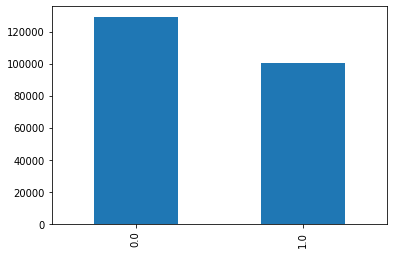

In [9]:
data['Sex'].value_counts().plot(kind='bar');

**Observation**

we have more female than male.

**Question 3**

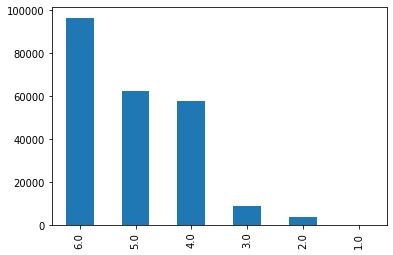

In [10]:
data['Education'].value_counts().plot(kind='bar');

**Observation**

A lot of the Respondents are educated.

**Question 4**

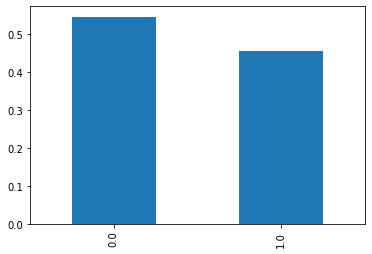

In [11]:
data['HighChol'].value_counts(normalize=True).plot(kind='bar');

**Observation**

About 45% of the Respondents have been told they have high cholesterol. 

**Question 5**

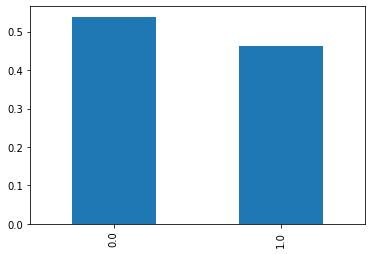

In [12]:
data['HighBP'].value_counts(normalize=True).plot(kind='bar');

**Observation**

About 45% of the Respondents have been told they have high blood pressure. 

**Question 6**

In [13]:
#data.query("`BMI` >= 18.0 and `BMI` < 25.0")

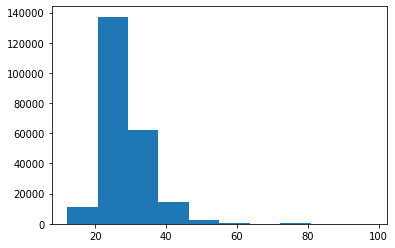

In [14]:
plt.hist(data['BMI'], bins=10);

**Observation**

A lot of Respondent BMI falls between the 20-30 range

### Bi-variate Analysis

**Question 7**

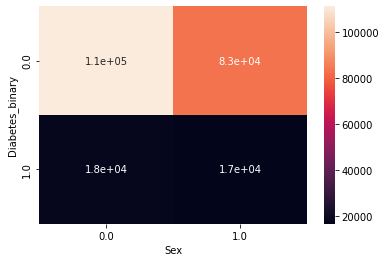

In [15]:
sns.heatmap(pd.crosstab(data['Diabetes_binary'], data['Sex']), annot=True);

**Observation**

The Gender respondents with diabetes seems balance.

**Question 8**

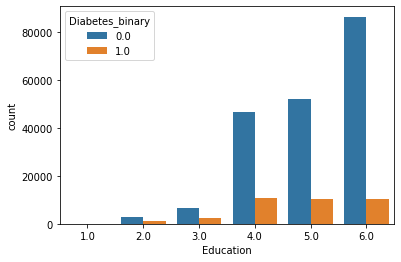

In [16]:
sns.countplot(x='Education', hue='Diabetes_binary', data=data);

**Observation**

The Education level of the respondent is not really determining not having diabetes.

**Question 9**

In [17]:
pd.crosstab(data['HighChol'], data['HighBP'])

HighBP,0.0,1.0
HighChol,,
0.0,82856,42095
1.0,40583,63725


In [18]:
data.query("`HighChol` == 1.0 and `HighBP` == 1.0")['Diabetes_binary'].value_counts(normalize=True)

0.0    0.700165
1.0    0.299835
Name: Diabetes_binary, dtype: float64

### Diagonistics Analysis

In this section, we'll look at how different category variables relate to whether a patient has autism or not by utilizing the Chi-Square method.

**Note: Finding relationships between categorical data via correlation is one of data science's pitfalls.**

##### Formulate our hypothesis

H0 - The feature did not have significance difference with Diabetes class.

H1 - The feature checked have significant difference with Diabetes class.

If the p-value is > 0.05 hence the feature did not have significance effect on Diabetes class and vice versa.

In [19]:
print(data['HighBP'].nunique())
print(data['HighChol'].nunique())

2
2


In [20]:
data.head()

,index,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [21]:
def chi_check(var1, var2, significance_level=None):
  tab_class = pd.crosstab(data[var1], data[var2], margins=True)
  tab_values = np.array([tab_class.iloc[0].values,
                  tab_class.iloc[1].values])
  stat, p, dof, expected_value= chi2_contingency(tab_values)
  print("p value: " + str(p)) 
  if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
  else:
    print('ACCEPT NULL HYPOTHESIS')

In [22]:
chi_check('HighBP', 'HighChol', significance_level=0.05)
chi_check('HighBP', 'Diabetes_binary', significance_level=0.05)
chi_check('HighChol', 'Diabetes_binary', significance_level=0.05)
chi_check('CholCheck', 'HighChol', significance_level=0.05)

p value: 0.0
Reject NULL HYPOTHESIS
p value: 0.0
Reject NULL HYPOTHESIS
p value: 0.0
Reject NULL HYPOTHESIS
p value: 0.0
Reject NULL HYPOTHESIS


### Feature selection with chi square

In [23]:
data = data.drop('index', axis=1)

In [24]:
data = data.astype('int64')

In [25]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [26]:
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

In [27]:
f_score=chi2(X,y)   #returns f score and p value 
f_score

(array([7.85342816e+03, 4.33840795e+03, 3.34943158e+01, 1.72328326e+04,
        3.63073851e+02, 2.23563605e+03, 5.94505776e+03, 7.72573973e+02,
        1.66936776e+02, 1.53385090e+02, 7.70487331e+02, 7.04893549e-01,
        3.12569769e+02, 8.98721864e+03, 2.34011769e+04, 1.14688128e+05,
        8.29174660e+03, 1.81591994e+02, 3.30042128e+03, 7.08754602e+02,
        4.90244012e+03]),
 array([0.00000000e+000, 0.00000000e+000, 7.14725653e-009, 0.00000000e+000,
        6.02933687e-081, 0.00000000e+000, 0.00000000e+000, 4.95567753e-170,
        3.45334483e-038, 3.15582316e-035, 1.40863163e-169, 4.01144260e-001,
        6.01762425e-070, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 2.17686653e-041, 0.00000000e+000, 3.73228752e-156,
        0.00000000e+000]))

In [28]:
p_value=pd.Series(f_score[1],index=X.columns)

In [29]:
p_value.sort_values(ascending=True,inplace=True)

In [30]:
p_value

HighBP                   0.000000e+00
Age                      0.000000e+00
DiffWalk                 0.000000e+00
PhysHlth                 0.000000e+00
MentHlth                 0.000000e+00
GenHlth                  0.000000e+00
Income                   0.000000e+00
Stroke                   0.000000e+00
BMI                      0.000000e+00
HighChol                 0.000000e+00
HeartDiseaseorAttack     0.000000e+00
PhysActivity            4.955678e-170
HvyAlcoholConsump       1.408632e-169
Education               3.732288e-156
Smoker                   6.029337e-81
NoDocbcCost              6.017624e-70
Sex                      2.176867e-41
Fruits                   3.453345e-38
Veggies                  3.155823e-35
CholCheck                7.147257e-09
AnyHealthcare            4.011443e-01
dtype: float64

In [31]:
p_value_features = p_value.reset_index().rename(columns={'index':'features', 0:'p_value'})

In [32]:
level_of_significance = 0.05
p_value_features['Decision'] = np.where(p_value_features['p_value'] < 0.05, 'Reject Null Hypothesis', 'Accept Null Hypothesis')

In [33]:
p_value_features

,features,p_value,Decision
0,HighBP,0.000000e+00,Reject Null Hypothesis
1,Age,0.000000e+00,Reject Null Hypothesis
2,DiffWalk,0.000000e+00,Reject Null Hypothesis
3,PhysHlth,0.000000e+00,Reject Null Hypothesis
4,MentHlth,0.000000e+00,Reject Null Hypothesis
5,GenHlth,0.000000e+00,Reject Null Hypothesis
6,Income,0.000000e+00,Reject Null Hypothesis
7,Stroke,0.000000e+00,Reject Null Hypothesis
8,BMI,0.000000e+00,Reject Null Hypothesis
9,HighChol,0.000000e+00,Reject Null Hypothesis


### Machine Learning model

In [34]:
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

In [35]:
y.value_counts(normalize=True) * 100

0    84.814555
1    15.185445
Name: Diabetes_binary, dtype: float64

In [36]:
# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =3, stratify=y)

In [37]:
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(y_train.shape))
print('Shape of the X_test {}'.format(X_test.shape))
print('Shape of the y_test {}'.format(y_test.shape))

Shape of the X_train (183407, 21)
Shape of the y_train (183407,)
Shape of the X_test (45852, 21)
Shape of the y_test (45852,)


In [38]:
algos = [LogisticRegression(), 
        #SVC(kernel='linear', random_state=0, probability=True),
         GaussianNB(),
         ExtraTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5,n_estimators=1000, max_features='auto', class_weight='balanced'),
        DecisionTreeClassifier(max_depth=5),
        CatBoostClassifier(eval_metric='AUC', metric_period=20, logging_level='Silent'),
        LGBMClassifier(n_estimators=500),
         XGBClassifier(max_depth=4, n_estimators=500),]

names = ['Logistic_Regression','Guassian','ExtraTree','RandomForest','Decision_Tree','Catboost', 'Lightgbm', 'Xgboost']
roc_list = []

In [39]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    score= roc_auc_score(y_test,y_pred)
    roc_list.append(score)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [40]:
evaluation = pd.DataFrame({'Model': names,
                           'Score': roc_list})

In [41]:
evaluation = evaluation.sort_values(by='Score', ascending=False)

In [42]:
evaluation

,Model,Score
5,Catboost,0.811744
6,Lightgbm,0.811317
7,Xgboost,0.810692
3,RandomForest,0.801506
0,Logistic_Regression,0.793212
4,Decision_Tree,0.789043
1,Guassian,0.765399
2,ExtraTree,0.741116
